In [1]:
import vectorbt as vbt
import numpy as np
import pandas as pd

data = vbt.YFData.download("BTC-USD", start='2017-01-01 UTC')
open_price = data.get('Open')
close_price = data.get('Close')
data

In [2]:
windows = list(range(8, 21))
wtypes = ["simple", "exp", "wilder"]
lower_ths = list(range(20, 31))
upper_ths = list(range(70, 81))


In [14]:
rsi = vbt.RSI.run(
            open_price, 
            window=windows, 
            param_product=True)
rsi.rsi.columns

Int64Index([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64', name='rsi_window')

In [17]:
from itertools import product
lower_ths_prod, upper_ths_prod = zip(*product(lower_ths, upper_ths))
len(lower_ths_prod)

121

In [20]:
lower_th_index = pd.Index(lower_ths_prod, name='lower_th')
lower_th_index


Int64Index([20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
            ...
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
           dtype='int64', name='lower_th', length=121)

In [24]:
rsi.rsi_crossed_below(lower_ths_prod, level_name='lower')

lower                         20                                            \
rsi_window                    8      9      10     11     12     13     14   
Date                                                                         
2017-01-01 00:00:00+00:00  False  False  False  False  False  False  False   
2017-01-02 00:00:00+00:00  False  False  False  False  False  False  False   
2017-01-03 00:00:00+00:00  False  False  False  False  False  False  False   
2017-01-04 00:00:00+00:00  False  False  False  False  False  False  False   
2017-01-05 00:00:00+00:00  False  False  False  False  False  False  False   
...                          ...    ...    ...    ...    ...    ...    ...   
2022-09-22 00:00:00+00:00  False   True  False  False  False  False  False   
2022-09-23 00:00:00+00:00  False  False  False  False  False  False  False   
2022-09-24 00:00:00+00:00  False  False  False  False  False  False  False   
2022-09-25 00:00:00+00:00  False  False  False  False  False  False  False   
2022-09-26 00:00:00+00:00  False  False  False  False  False  False  False   

lower                                           ...     30                \
rsi_window                    15     16     17  ...     11     12     13   
Date                                            ...                        
2017-01-01 00:00:00+00:00  False  False  False  ...  False  False  False   
2017-01-02 00:00:00+00:00  False  False  False  ...  False  False  False   
2017-01-03 00:00:00+00:00  False  False  False  ...  False  False  False   
2017-01-04 00:00:00+00:00  False  False  False  ...  False  False  False   
2017-01-05 00:00:00+00:00  False  False  False  ...  False  False  False   
...                          ...    ...    ...  ...    ...    ...    ...   
2022-09-22 00:00:00+00:00  False  False  False  ...  False   True  False   
2022-09-23 00:00:00+00:00  False  False  False  ...  False  False  False   
2022-09-24 00:00:00+00:00  False  False  False  ...   True  False  False   
2022-09-25 00:00:00+00:00  False  False  False  ...  False   True   True   
2022-09-26 00:00:00+00:00  False  False  False  ...  False  False  False   

lower                                                                       
rsi_window                    14     15     16     17     18     19     20  
Date                                                                        
2017-01-01 00:00:00+00:00  False  False  False  False  False  False  False  
2017-01-02 00:00:00+00:00  False  False  False  False  False  False  False  
2017-01-03 00:00:00+00:00  False  False  False  False  False  False  False  
2017-01-04 00:00:00+00:00  False  False  False  False  False  False  False  
2017-01-05 00:00:00+00:00  False  False  False  False  False  False  False  
...                          ...    ...    ...    ...    ...    ...    ...  
2022-09-22 00:00:00+00:00  False  False  False  False  False  False  False  
2022-09-23 00:00:00+00:00  False  False  False  False  False  False  False  
2022-09-24 00:00:00+00:00  False  False  False  False  False  False  False  
2022-09-25 00:00:00+00:00  False  False  False  False  False  False  False  
2022-09-26 00:00:00+00:00   True  False  False  False  False  False  False  

[2095 rows x 1573 columns]

###Superfast-supertrend

In [2]:
data = vbt.YFData.download("BTC-USD", start='2017-01-01 UTC')

high = data.get('High')
low = data.get('Low')
close = data.get('Close')

print(close)

Date
2017-01-01 00:00:00+00:00      998.325012
2017-01-02 00:00:00+00:00     1021.750000
2017-01-03 00:00:00+00:00     1043.839966
2017-01-04 00:00:00+00:00     1154.729980
2017-01-05 00:00:00+00:00     1013.380005
                                 ...     
2022-10-03 00:00:00+00:00    19623.580078
2022-10-04 00:00:00+00:00    20336.843750
2022-10-05 00:00:00+00:00    20160.716797
2022-10-06 00:00:00+00:00    19955.443359
2022-10-07 00:00:00+00:00    20005.662109
Freq: D, Name: Close, Length: 2106, dtype: float64


In [4]:
# import pandas as pd
# import numpy as np

# def get_med_price(high, low):
#     return (high + low) / 2
  
# def get_atr(high, low, close, period):
#     tr0 = abs(high - low)
#     tr1 = abs(high - close.shift())
#     tr2 = abs(low - close.shift())
#     tr = pd.concat((tr0, tr1, tr2), axis=1).max(axis=1)
#     atr = tr.ewm(alpha=1 / period, adjust=False, min_periods=period).mean()
#     return atr
  
# def get_basic_bands(med_price, atr, multiplier):
#     matr = multiplier * atr
#     upper = med_price + matr
#     lower = med_price - matr
#     return upper, lower
  
# def get_final_bands(close, upper, lower):
#     trend = pd.Series(np.full(close.shape, np.nan), index=close.index)
#     dir_ = pd.Series(np.full(close.shape, 1), index=close.index)
#     long = pd.Series(np.full(close.shape, np.nan), index=close.index)
#     short = pd.Series(np.full(close.shape, np.nan), index=close.index)

#     for i in range(1, close.shape[0]):
#         if close.iloc[i] > upper.iloc[i - 1]:
#             dir_.iloc[i] = 1
#         elif close.iloc[i] < lower.iloc[i - 1]:
#             dir_.iloc[i] = -1
#         else:
#             dir_.iloc[i] = dir_.iloc[i - 1]
#             if dir_.iloc[i] > 0 and lower.iloc[i] < lower.iloc[i - 1]:
#                 lower.iloc[i] = lower.iloc[i - 1]
#             if dir_.iloc[i] < 0 and upper.iloc[i] > upper.iloc[i - 1]:
#                 upper.iloc[i] = upper.iloc[i - 1]

#         if dir_.iloc[i] > 0:
#             trend.iloc[i] = long.iloc[i] = lower.iloc[i]
#         else:
#             trend.iloc[i] = short.iloc[i] = upper.iloc[i]
            
#     return trend, dir_, long, short
  
# def supertrend(high, low, close, period=7, multiplier=3):
#     med_price = get_med_price(high, low)
#     atr = get_atr(high, low, close, period)
#     upper, lower = get_basic_bands(med_price, atr, multiplier)
#     return get_final_bands(close, upper, lower)

In [9]:
supert, superd, superl, supers = supertrend(high, low, close)
print(supert)

Date
2017-01-01 00:00:00+00:00             NaN
2017-01-02 00:00:00+00:00             NaN
2017-01-03 00:00:00+00:00             NaN
2017-01-04 00:00:00+00:00             NaN
2017-01-05 00:00:00+00:00             NaN
                                 ...     
2022-10-02 00:00:00+00:00    21291.322061
2022-10-03 00:00:00+00:00    21291.322061
2022-10-04 00:00:00+00:00    21291.322061
2022-10-05 00:00:00+00:00    21291.322061
2022-10-06 00:00:00+00:00    21291.322061
Freq: D, Length: 2105, dtype: float64


In [11]:
date_range = slice('2020-01-01', '2022-02-01')
fig = close.loc[date_range].rename('Close').vbt.plot()
supers.loc[date_range].rename('Short').vbt.plot(fig=fig)
superl.loc[date_range].rename('Long').vbt.plot(fig=fig).show_svg()

NameError: name 'supers' is not defined

In [16]:
%%timeit
supertrend(high, low, close)

271 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
def get_atr(high, low, close, period):
    shifted_close = vbt.nb.fshift_1d_nb(close)
    tr0 = np.abs(high - low)
    tr1 = np.abs(high - shifted_close)
    tr2 = np.abs(low - shifted_close)
    tr = np.column_stack((tr0, tr1, tr2)).max(axis=1)
    atr = vbt.nb.wwm_mean_1d_nb(tr, period)
    return atr

In [4]:
from numba import njit

@njit
def get_final_bands_nb(close, upper, lower):
    trend = np.full(close.shape, np.nan)
    dir_ = np.full(close.shape, 1)
    long = np.full(close.shape, np.nan)
    short = np.full(close.shape, np.nan)

    for i in range(1, close.shape[0]):
        if close[i] > upper[i - 1]:
            dir_[i] = 1
        elif close[i] < lower[i - 1]:
            dir_[i] = -1
        else:
            dir_[i] = dir_[i - 1]
            if dir_[i] > 0 and lower[i] < lower[i - 1]:
                lower[i] = lower[i - 1]
            if dir_[i] < 0 and upper[i] > upper[i - 1]:
                upper[i] = upper[i - 1]

        if dir_[i] > 0:
            trend[i] = long[i] = lower[i]
        else:
            trend[i] = short[i] = upper[i]
            
    return trend, dir_, long, short

In [61]:
@njit
def get_basic_bands(med_price, atr, multiplier):
    matr = multiplier * atr
    upper = med_price + matr
    lower = med_price - matr
    return upper, lower

In [72]:
import talib

def faster_supertrend_talib(high, low, close, period, multiplier):
    avg_price = np.full(close.shape, np.nan)
    atr = np.full(close.shape, np.nan)
    upper = np.full(close.shape, np.nan)
    lower = np.full(close.shape, np.nan)
    for col in range(close.shape[1]):
        avg_price[:,col] = talib.MEDPRICE(high[:,col], low[:,col])
        atr[:,col] = talib.ATR(high[:,col], low[:,col], close[:,col], period)
        upper[:,col], lower[:,col] = get_basic_bands(avg_price[:,col], atr[:,col], multiplier)
    return get_final_bands_nb(close, upper, lower)



In [73]:
SuperTrend = vbt.IndicatorFactory(
     class_name='SuperTrend',
     input_names=['high', 'low', 'close'],
     param_names=['period', 'multiplier'],
     output_names=['supert', 'superd', 'superl', 'supers']
 ).from_apply_func(
     faster_supertrend_talib
 )


In [74]:
st = SuperTrend.run(high, low, close,
     period=7,  
     multiplier=3,
     param_product=True)
print(st.supert)

Date
2017-01-01 00:00:00+00:00             NaN
2017-01-02 00:00:00+00:00             NaN
2017-01-03 00:00:00+00:00             NaN
2017-01-04 00:00:00+00:00             NaN
2017-01-05 00:00:00+00:00             NaN
                                 ...     
2022-10-03 00:00:00+00:00    21291.322061
2022-10-04 00:00:00+00:00    21291.322061
2022-10-05 00:00:00+00:00    21291.322061
2022-10-06 00:00:00+00:00    21291.322061
2022-10-07 00:00:00+00:00    21291.322061
Freq: D, Name: (7, 3), Length: 2106, dtype: float64


In [9]:
# class SuperTrend(SuperTrend):
#     def plot(self, 
#              column=None, 
#              close_kwargs=None,
#              superl_kwargs=None,
#              supers_kwargs=None,
#              fig=None, 
#              **layout_kwargs):
#         close_kwargs = close_kwargs if close_kwargs else {}
#         superl_kwargs = superl_kwargs if superl_kwargs else {}
#         supers_kwargs = supers_kwargs if supers_kwargs else {}
        
#         close = self.select_col_from_obj(self.close, column).rename('Close')
#         supers = self.select_col_from_obj(self.supers, column).rename('Short')
#         superl = self.select_col_from_obj(self.superl, column).rename('Long')
        
#         fig = close.vbt.plot(fig=fig, **close_kwargs, **layout_kwargs)
#         supers.vbt.plot(fig=fig, **supers_kwargs)
#         superl.vbt.plot(fig=fig, **superl_kwargs)
        
#         return fig

In [12]:
# st = SuperTrend.run(high, low, close)
# st.loc[date_range].plot(
#     superl_kwargs=dict(trace_kwargs=dict(line_color='limegreen')),
#     supers_kwargs=dict(trace_kwargs=dict(line_color='red'))
# )

[7]
[3]
[[  998.32501221]
 [ 1021.75      ]
 [ 1043.83996582]
 ...
 [20160.71679688]
 [19955.44335938]
 [19993.2578125 ]]


AttributeError: 'SuperTrend' object has no attribute 'select_col_from_obj'

In [38]:
entries = (~st.superl.isnull()).vbt.signals.fshift()
exits = (~st.supers.isnull()).vbt.signals.fshift()

In [39]:
pf = vbt.Portfolio.from_signals(
    close=close, 
    entries=entries, 
    exits=exits, 
    fees=0.001, 
    freq='1d'
)

In [40]:
pf.stats()

Start                          2017-01-01 00:00:00+00:00
End                            2022-10-07 00:00:00+00:00
Period                                2106 days 00:00:00
Start Value                                        100.0
End Value                                    8211.603588
Total Return [%]                             8111.603588
Benchmark Return [%]                         1903.922757
Max Gross Exposure [%]                             100.0
Total Fees Paid                               209.924859
Max Drawdown [%]                               42.936338
Max Drawdown Duration                  510 days 00:00:00
Total Trades                                          26
Total Closed Trades                                   26
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   57.692308
Best Trade [%]                                189.536594
Worst Trade [%]                

In [65]:
periods = np.arange(4, 20)
multipliers = np.arange(20, 41) / 10

st = SuperTrend.run(
    high, low, close, 
    period=periods, 
    multiplier=multipliers,
    param_product=True,
)
print(st.supert)

supertrend_period                    4                               \
supertrend_multiplier               2.0           2.1           2.2   
Date                                                                  
2017-01-01 00:00:00+00:00           NaN           NaN           NaN   
2017-01-02 00:00:00+00:00           NaN           NaN           NaN   
2017-01-03 00:00:00+00:00           NaN           NaN           NaN   
2017-01-04 00:00:00+00:00           NaN           NaN           NaN   
2017-01-05 00:00:00+00:00    824.042969    812.707193    801.371417   
...                                 ...           ...           ...   
2022-10-03 00:00:00+00:00  20375.472085  20444.341734  20513.211384   
2022-10-04 00:00:00+00:00  20375.472085  20444.341734  20513.211384   
2022-10-05 00:00:00+00:00  20375.472085  20444.341734  20513.211384   
2022-10-06 00:00:00+00:00  20375.472085  20444.341734  20513.211384   
2022-10-07 00:00:00+00:00  20375.472085  20444.341734  20513.211384   

super

In [66]:
entries = (~st.superl.isnull()).vbt.signals.fshift()
exits = (~st.supers.isnull()).vbt.signals.fshift()
pf = vbt.Portfolio.from_signals(
    close=close, 
    entries=entries, 
    exits=exits, 
    fees=0.001, 
    freq='1d'
)


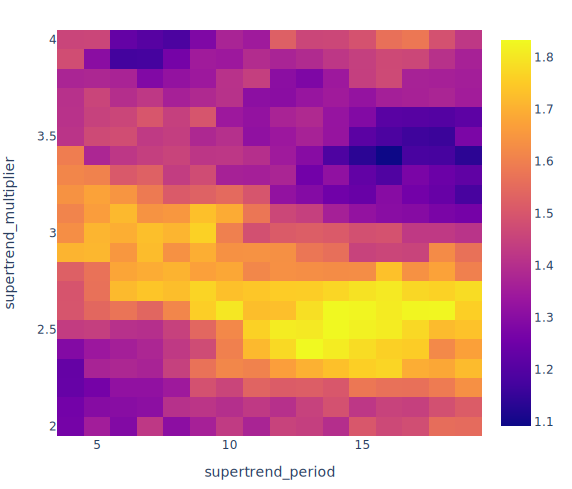

In [67]:
pf.sharpe_ratio().vbt.heatmap(
    x_level='supertrend_period', 
    y_level='supertrend_multiplier',
).show_svg()

In [68]:
idxmax = (pf.sharpe_ratio().idxmax())
pf[idxmax].stats()

Start                          2017-01-01 00:00:00+00:00
End                            2022-10-07 00:00:00+00:00
Period                                2106 days 00:00:00
Start Value                                        100.0
End Value                                    9763.159428
Total Return [%]                             9663.159428
Benchmark Return [%]                         1903.922757
Max Gross Exposure [%]                             100.0
Total Fees Paid                               408.138555
Max Drawdown [%]                               49.332111
Max Drawdown Duration                  510 days 00:00:00
Total Trades                                          35
Total Closed Trades                                   35
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   54.285714
Best Trade [%]                                 98.161165
Worst Trade [%]                

In [59]:
idxmax

(13, 2.4)